Outlines :
1. Importing libraries
2. Missing values imputation(data preprocessing)
3. EDA
4. Feature Engineering
5. Model Building
6. Model evaluation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/omairaasim/machine_learning/master/project_11_k_nearest_neighbor/iphone_purchase_records.csv')

In [3]:
data

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
data.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

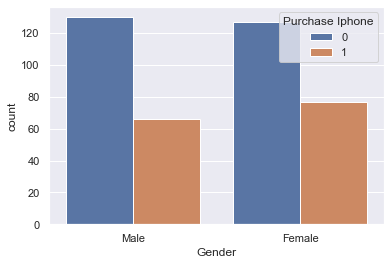

In [10]:
sns.countplot(x='Gender',data =data,hue='Purchase Iphone')

In [13]:
data.groupby('Gender')['Purchase Iphone'].value_counts()

Gender  Purchase Iphone
Female  0                  127
        1                   77
Male    0                  130
        1                   66
Name: Purchase Iphone, dtype: int64

In [14]:
data.groupby('Gender')['Salary'].mean()

Gender
Female    71759.803922
Male      67642.857143
Name: Salary, dtype: float64

In [15]:
y = data.pop('Purchase Iphone')
x = data

In [16]:
x

,Gender,Age,Salary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

x.Gender = encoder.fit_transform(x.Gender)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=25)

In [25]:
x_train.shape

(280, 3)

In [26]:
y_train.shape

(280,)

In [27]:
x_test.shape

(120, 3)

In [28]:
y_test.shape

(120,)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
y_pred = model.predict(x_test)


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[71,  2],
       [ 6, 41]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        73
           1       0.95      0.87      0.91        47

    accuracy                           0.93       120
   macro avg       0.94      0.92      0.93       120
weighted avg       0.93      0.93      0.93       120

